In [1]:
import PauLisa as pl


DEFAULT PARAMS (PauLisa.defaultParams)
 wavelength =1.064e-06m
 waist size(w0) =0.001m
 z0 =0m
 Rayleigh Range (Zr) =2.95262467443m


DEFAULT X,Y PLANE (PauLisa.defaultPlane)
 x: -0.05m to 0.05m with 1000 points.
 y: -0.05m to 0.05m with 1000 points.



Function Usage:
OPTICAL PARAMETERS DEFINITION     
 PARAMETERS=PauLisa.Params(wavelength,w0,z0)

PLANE OF PROPAGATION DEFINITION     
 PLANE=PauLisa.Plane(xmin,xmax,xpoints,ymin,ymax,ypoints) 

MODES DEFNITION AND DISPLAY     
 MODESARRAY=PauLisa.Modes((n1,m1,c1),(n2,m2,c2))     
 PauLisa.ShowModes(MODES) 

AMPLITUDE CALCULATIONS     
 Calculate amplitude over plane: RESULT=PauLisa.Calculate(PARAMS,PLANE,MODES,z) 
 Simple calculation from coordinates: PauLisa.Amplitude(PARAMS,x,y,z,MODES) 

INTENSITY PLOTTING     
 PauLisa.Contour(RESULT, **xlim,**ylim)     
 PauLisa.IntensitySliceX(y, *RESULT, **xlim)     
 PauLisa.IntensitySliceY(x, *RESULT, **xlim) 

PHASE CALCULATION     
 PauLisa.Phase(PARAMS,x,y,z,MODES) 

PHASE PLOTTING     
 Pau

In [2]:
modes=pl.Modes((0,0,1))

pl.ShowModes(modes)


n\m [0]
0   [1]


In [3]:
pl.Phase(pl.defaultParams,0.01,0.01,100,modes)

110.25761011378654

In [4]:
print pl.degrees(pl.cmath.phase(pl.Amplitude(pl.defaultParams, 0.01, 0.01, 100, modes)))

110.257610114


In [5]:
print pl.np.sqrt(pl.defaultParams.getQ0())
print pl.cmath.sqrt(pl.defaultParams.getQ0())

print pl.defaultParams.getQ0()

(1.215035940708442+1.2150359407084421j)
(1.21503594071+1.21503594071j)
2.95262467443j


In [6]:
f1 = pl.Calculate(params=pl.defaultParams,plane=pl.defaultPlane,modes=modes,z=10)
f2 = pl.Calculate2(params=pl.defaultParams,plane=pl.defaultPlane,modes=modes,z=10)
f3 = pl.Calculate(params=pl.defaultParams,plane=pl.defaultPlane,modes=modes,z=50)
f4 = pl.Calculate2(params=pl.defaultParams,plane=pl.defaultPlane,modes=modes,z=50)



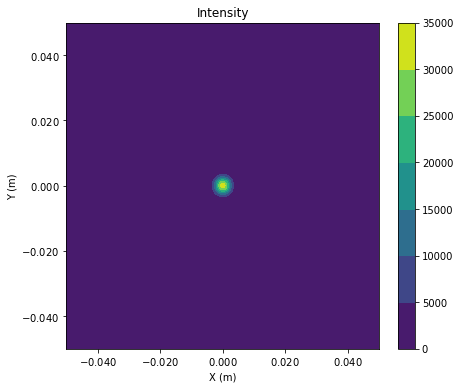

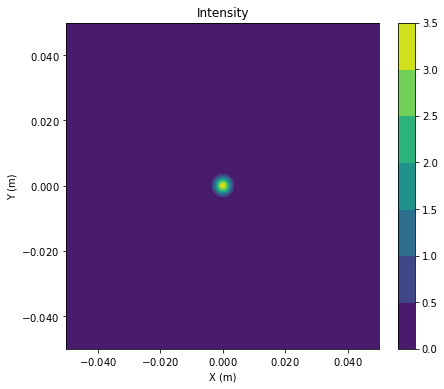

In [7]:
pl.Contour(f1)
pl.Contour(f2)

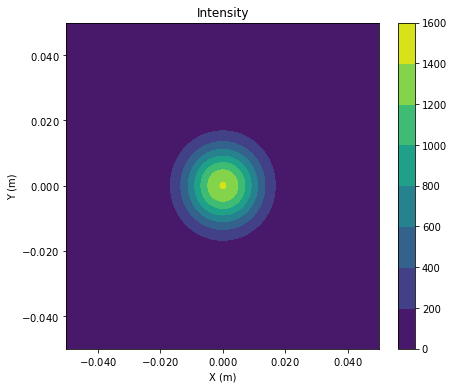

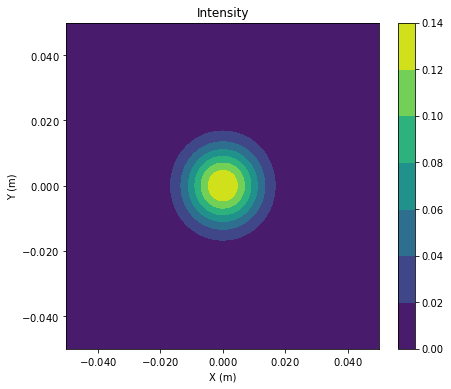

In [8]:
pl.Contour(f3)
pl.Contour(f4)

In [9]:
a1 = pl.Amplitude(params=pl.defaultParams,x=0.01,y=0.02,modes=modes,z=60)
a2 = pl.Amplitude2(params=pl.defaultParams,x=0.01,y=0.02,modes=modes,z=60)

print a1
print a2
print abs(a1)**2
print abs(a2)**2*10000

(-4.78971082266+8.03033966375j)
(-0.04764413458796992+0.079879265762088j)
87.42768488
86.50660659326877


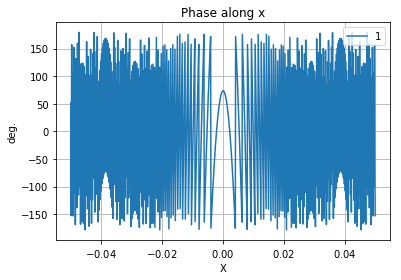

In [10]:
#pl.PhaseContour(pl.Calculate(pl.defaultParams,pl.defaultPlane,modes,10))
#pl.PhaseContour(pl.Calculate(pl.defaultParams,pl.defaultPlane,modes,10))\
pl.PhaseSliceX(0,f2)


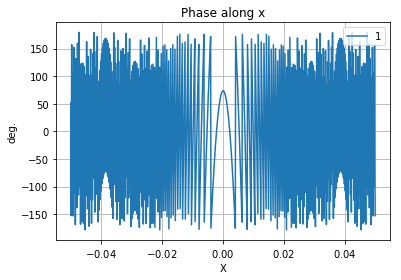

In [11]:
pl.PhaseSliceX2(0,f2)

In [13]:
print pl.Phase2(pl.defaultParams,0,0,10,modes)
print pl.Phase2(pl.defaultParams,0,0,50,[(1,1,1)])
print pl.Phase(pl.defaultParams,0,0,10,modes)

print pl.Phase(pl.defaultParams,0,0,50,[(1,1,1)])

73.55010741794989
114.49715193906408
73.55010741794989
94.9377763426372


In [21]:
modes1 = [(1,1,1)]
modes2 = [(0,0,1),(0,1,0.1*1j)]
f1 = pl.Calculate(pl.defaultParams,pl.defaultPlane,modes1, 60)
f2 = pl.Calculate2(pl.defaultParams,pl.defaultPlane,modes1, 60)
f3 = pl.Calculate(pl.defaultParams,pl.defaultPlane,modes2, 50)
f4 = pl.Calculate2(pl.defaultParams,pl.defaultPlane,modes2, 50)



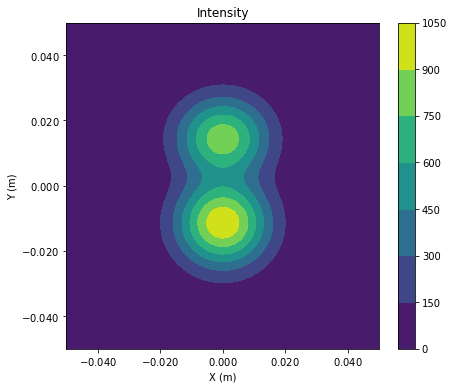

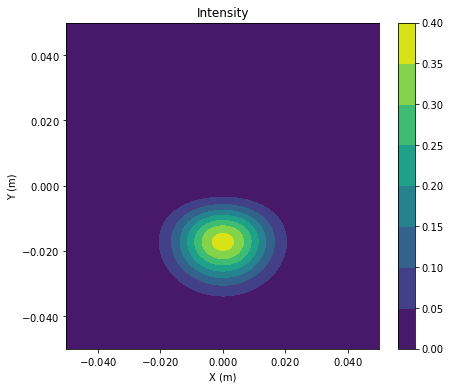

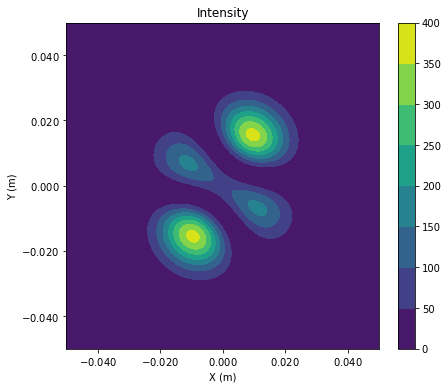

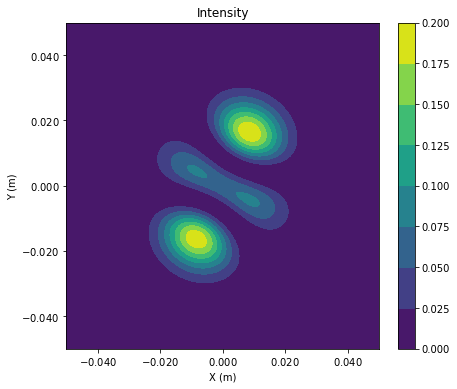

In [22]:
pl.Contour(f1)
pl.Contour(f2)
pl.Contour(f3)
pl.Contour(f4)